In [169]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('enhanced_anxiety_dataset.csv')
dataset

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


In [170]:
# Show total missing values per column
print(dataset.isnull().sum())

# Show rows with missing values
print(dataset[dataset.isnull().any(axis=1)])

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64
Empty DataFrame
Columns: [Age, Gender, Occupation, Sleep Hours, Physical Activity (hrs/week), Caffeine Intake (mg/day), Alcohol Consumption (drinks/week), Smoking, Family History of Anxiety, Stress Level (1-10), Heart Rate (bpm), Breathing Rate (

In [171]:
df_cleaned = dataset.dropna()

In [172]:
# For numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number)
descriptive_stats_num = numerical_cols.describe()
print("Numerical columns descriptive statistics:")
print(descriptive_stats_num)

Numerical columns descriptive statistics:
                Age   Sleep Hours  Physical Activity (hrs/week)  \
count  11000.000000  11000.000000                  11000.000000   
mean      40.241727      6.650691                      2.942136   
std       13.236140      1.227509                      1.827825   
min       18.000000      2.300000                      0.000000   
25%       29.000000      5.900000                      1.500000   
50%       40.000000      6.700000                      2.800000   
75%       51.000000      7.500000                      4.200000   
max       64.000000     11.300000                     10.100000   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count              11000.000000                       11000.000000   
mean                 286.090000                           9.701636   
std                  144.813157                           5.689713   
min                    0.000000                           0.000000   
25% 

In [173]:
# For categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category'])

# General categorical stats like count, unique, top, freq
descriptive_stats_cat = categorical_cols.describe()
print("\nCategorical columns general descriptive statistics:")
print(descriptive_stats_cat)

# Detailed value counts for each categorical column
print("\nDetailed value counts for each categorical column:")
for col in categorical_cols.columns:
    print(f"\nColumn: {col}")
    print(categorical_cols[col].value_counts())


Categorical columns general descriptive statistics:
        Gender Occupation Smoking Family History of Anxiety Dizziness  \
count    11000      11000   11000                     11000     11000   
unique       3         13       2                         2         2   
top     Female   Musician     Yes                       Yes       Yes   
freq      3730        892    5779                      5847      5672   

       Medication Recent Major Life Event  
count       11000                   11000  
unique          2                       2  
top           Yes                     Yes  
freq         5666                    5623  

Detailed value counts for each categorical column:

Column: Gender
Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64

Column: Occupation
Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athl

In [174]:
anxiety_col = 'Anxiety Level (1-10)'

df_sorted = df_cleaned.sort_values(anxiety_col).reset_index(drop=True)

n = len(df_sorted)

# Define exact cutoffs
low_end = int(n * 0.3)
moderate_end = int(n * 0.6)

df_sorted.loc[:low_end - 1, 'Anxiety_Level_Category'] = 'Low'
df_sorted.loc[low_end:moderate_end - 1, 'Anxiety_Level_Category'] = 'Moderate'
df_sorted.loc[moderate_end:, 'Anxiety_Level_Category'] = 'High'

print("\nCounts:")
print(df_sorted['Anxiety_Level_Category'].value_counts())

print("\nProportions (%):")
print(df_sorted['Anxiety_Level_Category'].value_counts(normalize=True) * 100)



Counts:
Anxiety_Level_Category
High        4400
Low         3300
Moderate    3300
Name: count, dtype: int64

Proportions (%):
Anxiety_Level_Category
High        40.0
Low         30.0
Moderate    30.0
Name: proportion, dtype: float64



Total rows: 11000
Train rows: 8800
Test rows: 2200
Predicted rows (RF): 2200



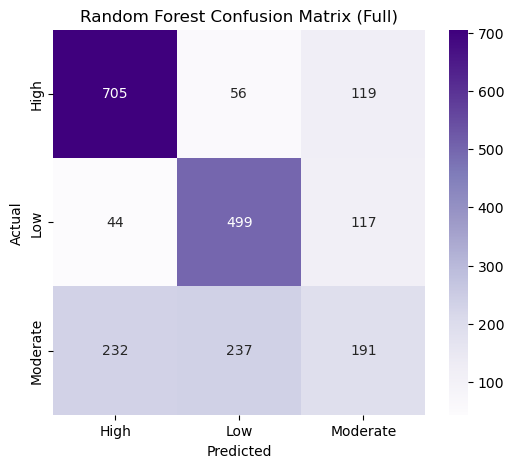


Random Forest Classification Report (Full):
              precision    recall  f1-score   support

        High       0.72      0.80      0.76       880
         Low       0.63      0.76      0.69       660
    Moderate       0.45      0.29      0.35       660

    accuracy                           0.63      2200
   macro avg       0.60      0.62      0.60      2200
weighted avg       0.61      0.63      0.61      2200


Top 5 important features (RF): ['Stress Level (1-10)', 'Caffeine Intake (mg/day)', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Heart Rate (bpm)']
Predicted rows (RF Top 5): 2200



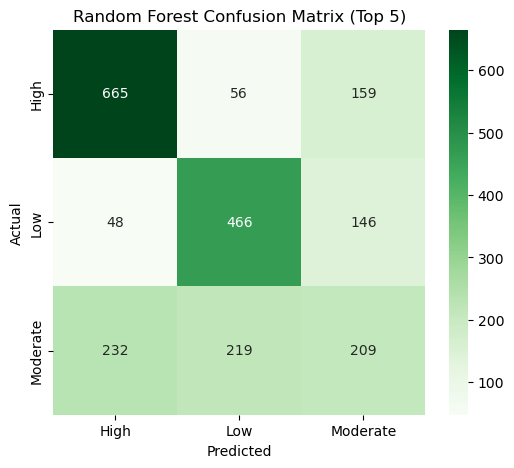


Random Forest Classification Report (Top 5):

              precision    recall  f1-score   support

        High       0.70      0.76      0.73       880
         Low       0.63      0.71      0.67       660
    Moderate       0.41      0.32      0.36       660

    accuracy                           0.61      2200
   macro avg       0.58      0.59      0.58      2200
weighted avg       0.59      0.61      0.60      2200



In [175]:
#Random Forest Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

anxiety_col = 'Anxiety Level (1-10)'

df_sorted = df_cleaned.sort_values(anxiety_col).reset_index(drop=True)

n = len(df_sorted)
low_n = round(n * 0.3)
moderate_n = round(n * 0.3)
high_n = n - low_n - moderate_n

df_sorted['Anxiety_Level_Category'] = pd.Series(dtype='object')
df_sorted.loc[:low_n - 1, 'Anxiety_Level_Category'] = 'Low'
df_sorted.loc[low_n:low_n + moderate_n - 1, 'Anxiety_Level_Category'] = 'Moderate'
df_sorted.loc[low_n + moderate_n:, 'Anxiety_Level_Category'] = 'High'

target_col = 'Anxiety_Level_Category'
cols_to_exclude =  [anxiety_col, target_col, 'Occupation', 'Gender']

X = df_sorted.drop(columns=cols_to_exclude)
y = df_sorted[target_col]

numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(f"\nTotal rows: {len(X_encoded)}")
print(f"Train rows: {len(X_train)}")
print(f"Test rows: {len(X_test)}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Predicted rows (RF): {len(y_pred_rf)}\n")

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (Full)')
plt.show()

print("\nRandom Forest Classification Report (Full):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_encoded.columns
top5_features = features[indices[:5]]
print("\nTop 5 important features (RF):", list(top5_features))

X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(X_train_top5, y_train)
y_pred_rf_top5 = rf_top5.predict(X_test_top5)

print(f"Predicted rows (RF Top 5): {len(y_pred_rf_top5)}\n")

cm_rf_top5 = confusion_matrix(y_test, y_pred_rf_top5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_top5, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (Top 5)')
plt.show()

print("\nRandom Forest Classification Report (Top 5):\n")
print(classification_report(y_test, y_pred_rf_top5, target_names=le.classes_))


In [176]:
from joblib import dump

# Suppose your trained model is named:
# rf_model = RandomForestClassifier(...)

# ✅ Save the model
dump(rf_model, 'random_forest_model.joblib')

# ✅ Save the scaler if you scaled inputs
dump(scaler, 'rf_scaler.joblib')

# ✅ Save the label encoder if you used one
dump(le, 'rf_label_encoder.joblib')

# ✅ Optionally save feature names if you want to use only Top 5 later
dump(list(top5_features), 'rf_top5_features.joblib')

print("✅ Random Forest model, scaler, label encoder saved.")

✅ Random Forest model, scaler, label encoder saved.



Total rows: 11000
Train rows: 8800
Test rows: 2200
Predicted rows (SVM): 2200



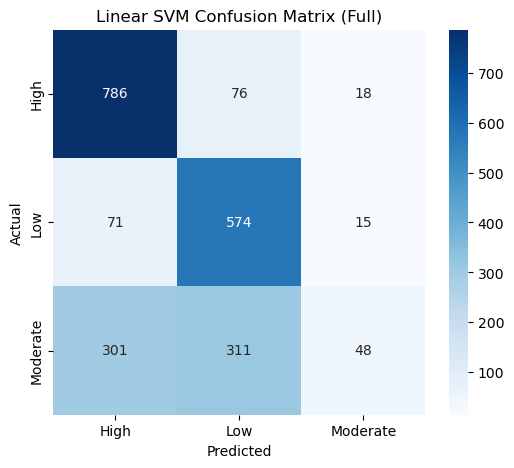


Linear SVM Classification Report (Full):
              precision    recall  f1-score   support

        High       0.68      0.89      0.77       880
         Low       0.60      0.87      0.71       660
    Moderate       0.59      0.07      0.13       660

    accuracy                           0.64      2200
   macro avg       0.62      0.61      0.54      2200
weighted avg       0.63      0.64      0.56      2200


Top 5 important features (SVM): ['Stress Level (1-10)', 'Sleep Hours', 'Therapy Sessions (per month)', 'Caffeine Intake (mg/day)', 'Family History of Anxiety_Yes']
Predicted rows (SVM Top 5): 2200



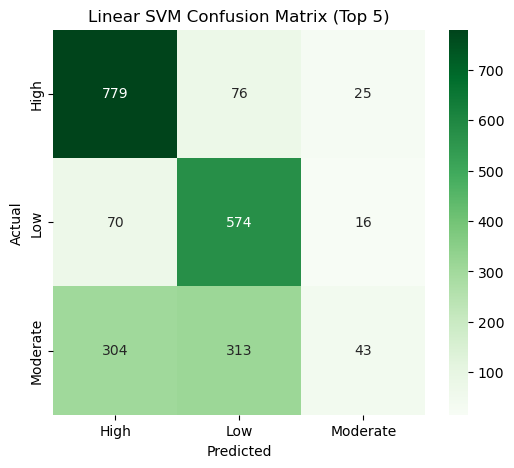


Linear SVM Classification Report (Top 5):

              precision    recall  f1-score   support

        High       0.68      0.89      0.77       880
         Low       0.60      0.87      0.71       660
    Moderate       0.51      0.07      0.12       660

    accuracy                           0.63      2200
   macro avg       0.59      0.61      0.53      2200
weighted avg       0.60      0.63      0.55      2200



In [177]:
#Support Vector Machine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

anxiety_col = 'Anxiety Level (1-10)'

df_sorted = df_cleaned.sort_values(anxiety_col).reset_index(drop=True)

n = len(df_sorted)
low_n = round(n * 0.3)
moderate_n = round(n * 0.3)
high_n = n - low_n - moderate_n

df_sorted['Anxiety_Level_Category'] = pd.Series(dtype='object')
df_sorted.loc[:low_n - 1, 'Anxiety_Level_Category'] = 'Low'
df_sorted.loc[low_n:low_n + moderate_n - 1, 'Anxiety_Level_Category'] = 'Moderate'
df_sorted.loc[low_n + moderate_n:, 'Anxiety_Level_Category'] = 'High'

target_col = 'Anxiety_Level_Category'
cols_to_exclude = [anxiety_col, target_col, 'Occupation', 'Gender']

X = df_sorted.drop(columns=cols_to_exclude)
y = df_sorted[target_col]

numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(f"\nTotal rows: {len(X_encoded)}")
print(f"Train rows: {len(X_train)}")
print(f"Test rows: {len(X_test)}")

svm_linear = LinearSVC(random_state=42, dual=False, max_iter=5000)
svm_linear.fit(X_train, y_train)
y_pred_svm = svm_linear.predict(X_test)

print(f"Predicted rows (SVM): {len(y_pred_svm)}\n")

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear SVM Confusion Matrix (Full)')
plt.show()

print("\nLinear SVM Classification Report (Full):")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

coefs = np.abs(svm_linear.coef_).mean(axis=0)
indices = np.argsort(coefs)[::-1]
features = X_encoded.columns
top5_features = features[indices[:5]]
print("\nTop 5 important features (SVM):", list(top5_features))

X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

svm_top5 = LinearSVC(random_state=42, dual=False, max_iter=5000)
svm_top5.fit(X_train_top5, y_train)
y_pred_svm_top5 = svm_top5.predict(X_test_top5)

print(f"Predicted rows (SVM Top 5): {len(y_pred_svm_top5)}\n")

cm_svm_top5 = confusion_matrix(y_test, y_pred_svm_top5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_top5, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear SVM Confusion Matrix (Top 5)')
plt.show()

print("\nLinear SVM Classification Report (Top 5):\n")
print(classification_report(y_test, y_pred_svm_top5, target_names=le.classes_))


In [178]:
from joblib import dump

svm_top5 = LinearSVC(random_state=42, dual=False, max_iter=5000)
svm_top5.fit(X_train_top5, y_train)

scaler_top5 = StandardScaler()
scaler_top5.fit(X_train_top5)

dump(svm_top5, 'linear_svm_top5_model.joblib')
dump(scaler_top5, 'scaler_top5.joblib')
dump(le, 'label_encoder.joblib')
dump(list(top5_features), 'svm_top5_features.joblib')

['svm_top5_features.joblib']